## SQL code

## Extracting Seattles Data from the database 
select * from city_data where city = 'Seattle'

## Extracting Global data from the database
select * from Global_data

## Loading libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm 

## loading the data

In [2]:
Seattle=pd.read_csv('Seattle_Temp.csv')
Global=pd.read_csv('Global_Temp.csv')


## cleaning the data

In [3]:
#interpolating the missing values 
Seattle_no_mv=Seattle.interpolate()
Seattle_no_mv.head(20)
#creatting a DataFrame for globale temperature that starts the same point as Seattle's 
Global_2=Global[Global['year']>1828]
Global_2=Global_2.reset_index(drop=True)

## calculating and adding rolling average to each DataFrame

In [4]:
Seattle_no_mv['mv_avg']=Seattle_no_mv['avg_temp'].rolling(10).mean()
mv_avg=Global_2['avg_temp'].rolling(10).mean()
Global_2['mv_avg']=mv_avg

In [5]:
Global_2.reset_index(drop=True)

,year,avg_temp,mv_avg
0,1829,7.94,NaN
1,1830,8.52,NaN
2,1831,7.64,NaN
3,1832,7.45,NaN
4,1833,8.01,NaN
5,1834,8.15,NaN
6,1835,7.39,NaN
7,1836,7.70,NaN
8,1837,7.38,NaN
9,1838,7.51,7.769


In [6]:
Seattle_no_mv.describe()

,year,avg_temp,mv_avg
count,186.000000,186.000000,177.000000
mean,1920.500000,7.478522,7.492623
std,53.837719,0.775112,0.422553
min,1828.000000,3.520000,6.094000
25%,1874.250000,7.050000,7.256000
50%,1920.500000,7.490000,7.449000
75%,1966.750000,7.917500,7.742000
max,2013.000000,9.950000,8.339000


Text(0.5, 1.0, 'Seattle/Global Temperature Evolution ')

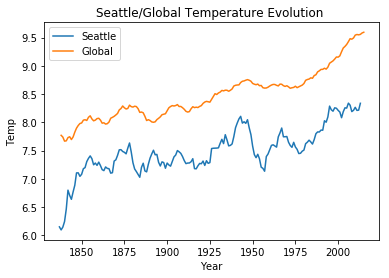

In [7]:
plt.plot(Seattle_no_mv['year'],Seattle_no_mv['mv_avg'],label='Seattle')
plt.plot(Global_2['year'],Global_2['mv_avg'],label='Global')
plt.ylabel('Temp')
plt.xlabel('Year')
plt.legend()
plt.title('Seattle/Global Temperature Evolution ')

In [8]:
mv_dif = Global_2['mv_avg']-Seattle_no_mv['mv_avg']

In [9]:
Seattle_no_mv['mv_dif']=mv_dif

In [10]:
Seattle_no_mv.describe()

,year,avg_temp,mv_avg,mv_dif
count,186.000000,186.000000,177.000000,177.000000
mean,1920.500000,7.478522,7.492623,0.979682
std,53.837719,0.775112,0.422553,0.203330
min,1828.000000,3.520000,6.094000,0.503000
25%,1874.250000,7.050000,7.256000,0.830000
50%,1920.500000,7.490000,7.449000,0.965000
75%,1966.750000,7.917500,7.742000,1.104000
max,2013.000000,9.950000,8.339000,1.644000


In [12]:
#calculating correlation coeffession 
Seattle_no_mv['mv_avg'].corr(Global_2['mv_avg'])

0.888037396733039

## observations 

 - Seattle average temperature is lower than globale temperature with an average of 1 degree celciuss 
 
 - from the line chart an uptrend can be noticed which aligns with the globale warming research findings 
 
 - Seattle average temperature graph is approximately parralelle to the global which indicates a direct correlation 
 tha was confirmed by calcualting the correlation coeffession (0.88)
 
 - a drastic increase in temperature can be noticed in the chart after the 1950s and even steeper after the 1970 which can be explained by the high production and high consumption of fossil fuel in the post war era(1950s) and after the oil crisis years(early 1970s) ref : https://ourworldindata.org/fossil-fuels